In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,7)

<IPython.core.display.Javascript object>


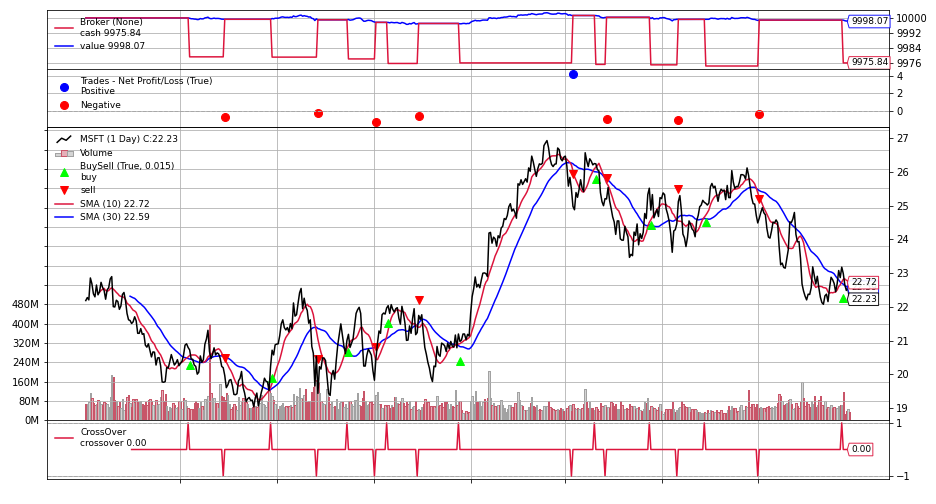

[[<Figure size 936x504 with 5 Axes>]]

In [8]:
from datetime import datetime
import backtrader as bt

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

data0 = bt.feeds.YahooFinanceData(dataname='MSFT', fromdate=datetime(2011, 1, 1),
                                  todate=datetime(2012, 12, 31))
cerebro.adddata(data0)

cerebro.run()
cerebro.plot()